In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from keras import layers
from keras.models import Sequential

In [28]:
dataset_train = pd.read_csv('trainset.csv')

In [29]:
dataset_train.columns
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [30]:
train_set = dataset_train.iloc[:,1:2].values
type(train_set)
train_set.shape

(1259, 1)

In [31]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)

In [32]:
training_set_scaled.shape

(1259, 1)

In [33]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))

In [34]:
X_train.shape
length = 60
n_features = 1

In [56]:
model = Sequential()

model.add(layers.SimpleRNN(50, input_shape = (length, n_features)))
model.add(layers.Dense(1))

model.compile(optimizer = "adam", loss = "mse")

model.summary()

model.fit(X_train1,y_train,epochs=100, batch_size=32)

dataset_test = pd.read_csv('testset.csv')

test_set = dataset_test.iloc[:,1:2].values

test_set.shape

dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0271
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0013
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0010
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 7.0607e-04
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 6.5028e-04
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 6.8694e-04
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.1344e-04
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.5155e-04
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.7505e-04
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.1129e-04
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.1593e-04
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.4561e-04
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.0812e-04
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.0237e-04
Epoch 15/100


In [57]:
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
y_test = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
  y_test.append(inputs_scaled[i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [58]:
print("Name:KRISHNARAJ D , Register Number:212222230070")
model.summary()

Name:KRISHNARAJ D , Register Number:212222230070


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,955 (31.08 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,304 (20.72 KB)

Name: KRISHNARAJ D, Register Number: 212222230070


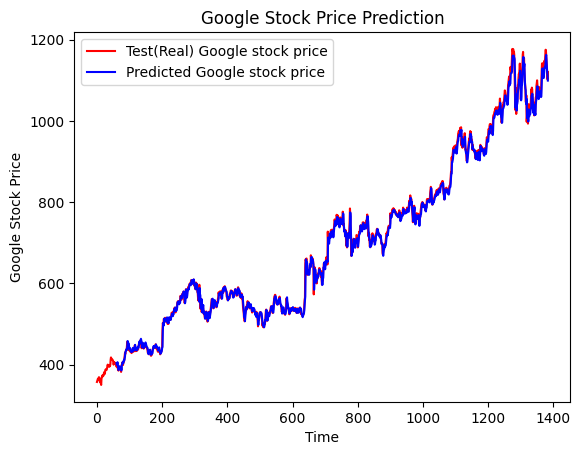

In [59]:
print("Name: KRISHNARAJ D, Register Number: 212222230070")
plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error as mse
print("Name:KRISHNARAJ D , Register Number:212222230070")
mse(y_test,predicted_stock_price)

Name:KRISHNARAJ D , Register Number:212222230070


534185.8433821439